# Problem Set 1


## Instructions (please read everything carefully)

* The questions are given in the cells, below. Your answers should be in this same notebook, beneath each question (insert as many cells as you need), with
  - text in markdown cells. Equations should be in $\LaTeX$
  - fully functional code, with comments so we can understand what you are doing. If you based any part of your code on someone else's initial implementation, cite appropriately.
  - outputs, in presentable format. No need to waste a large amount of time here, but:
    - Plots should have clear titles, axis labels, and legends if needed.
    - If you are asked to run your code for different cases, make separate plots and compare. Please don't ask us to modify your code and rerun to see different results.
    - Numerical answers should have a sensible number of digits with surrounding text that identifies what is being printed.

* Commit and push your notebook to your gitlab fork for this class.  Do not change the name of the file.

* Solutions will be posted soon after the deadline, and your work will be graded within one week.

* Problems are typically posted one week in advance. You are encouraged to work together on problems, but the actual code and the full notebook must be your own work.

* The time it takes to write code is usually unpredictable, particularly at the beginning of the quarter. __Start early__.

* If anything is unclear, please ask! The slack space is a convenient method that gives everyone the benefit of your question and the answer(s).



In [1]:
# these were discussed in lecture
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'  # remove or comment this line if not needed
import sys
print(sys.version)

3.11.4 (main, Jul  5 2023, 14:15:25) [GCC 11.2.0]


## Problem 1
(10 points)

Warm up. In the cell below, write code that produces the following (each item of output on a different line):

  a) The text, "Hello, world."  (don't forget the comma and period. no, you do not need the quotation marks in the output.)
  
  b) The same thing as (a), in any other written language of your choice.
  
  c) Calculate the number of seconds in a typical week, and format the output as, "The number of seconds in a typical week, to 4 significant digits and in scientific notation is (your number here, correctly formatted)." Don't forget the period at the end.
  
  Recall, in python, common format strings:     
 * %.3e - format as exponential with three digits after the decimal
 * %.3f - format as a float with three digits after the decimal
 * %e   - format as exponential
 * %f   - format as a float
 * %d   - format as an integer


In [2]:
# your code here
print("Hello, world.")
print()
print("Привет, мир.")
print()
seconds=60*60*24*7

print(f'The number of seconds in a typical week, to 4 significant digits and in scientific notation is {"%.3e" %seconds}.')

# seconds="{:1.3e}".format(seconds)
# print("The number of seconds in a typical week, to 4 significant digits and in scientific notation is " + seconds+".")

Hello, world.

Привет, мир.

The number of seconds in a typical week, to 4 significant digits and in scientific notation is 6.048e+05.


----------------------
## Problem 2
(15 points)

Subtractive error exploration. As noted in the textbook (section 3.1.2), the solution to the quadratic equation provides a clear example of subtractive errors. For $$ax^2+bx+c=0$$ the solutions are given by $$x_\pm=\frac{-b\pm\sqrt{b^2-4ac}}{2a}$$ or, equivalently, $$x_\pm^\prime=\frac{-2c}{b\pm\sqrt{b^2-4ac}}.$$

Many of us didn't learn about the prime solution in school. Interestingly, problems of finite machine precision arise when $b^2>>4ac$. See why? First, write a function that calculates the two solutions both ways (so, 4 results) for any $(a,b,c)$. Then, use it to explore:
  * follow the suggestion in the textbook by setting $a=b=1$ and $c=10^{-n}$ for $n=1, 2, 3,...$. Plot the log of the error (NOTE: you will have to think carefully about how to calculate the error -- **do that before you start coding**, how to handle negative errors, and how to handle errors that, given finite precision, are stored as 0.) as a fuction of $n$ for $n=1...13$. BTW, be careful that you take the $\log_{10}$ not $\log_e$ (a.k.a. $\ln$).
  * repeat for a smaller value of $a= 10^{-3}$.
  * **Bonus** (not required, to be done after you finish everything else on this problem set): make a two-dimensional image (something like the Mandelbrot images in the first lecture), or you can make a 3-d surface plot if you prefer (or both!), of the log of the error for each of the 4 solutions. The two-dimensional field should be $\log(c)$ on the horizontal axis and $\log(4ac)$ or $\log(a)$ on the vertical axis. Be sure to include the color scale or third axis to display the log of the error. Check that the result matches your results above in the right places.

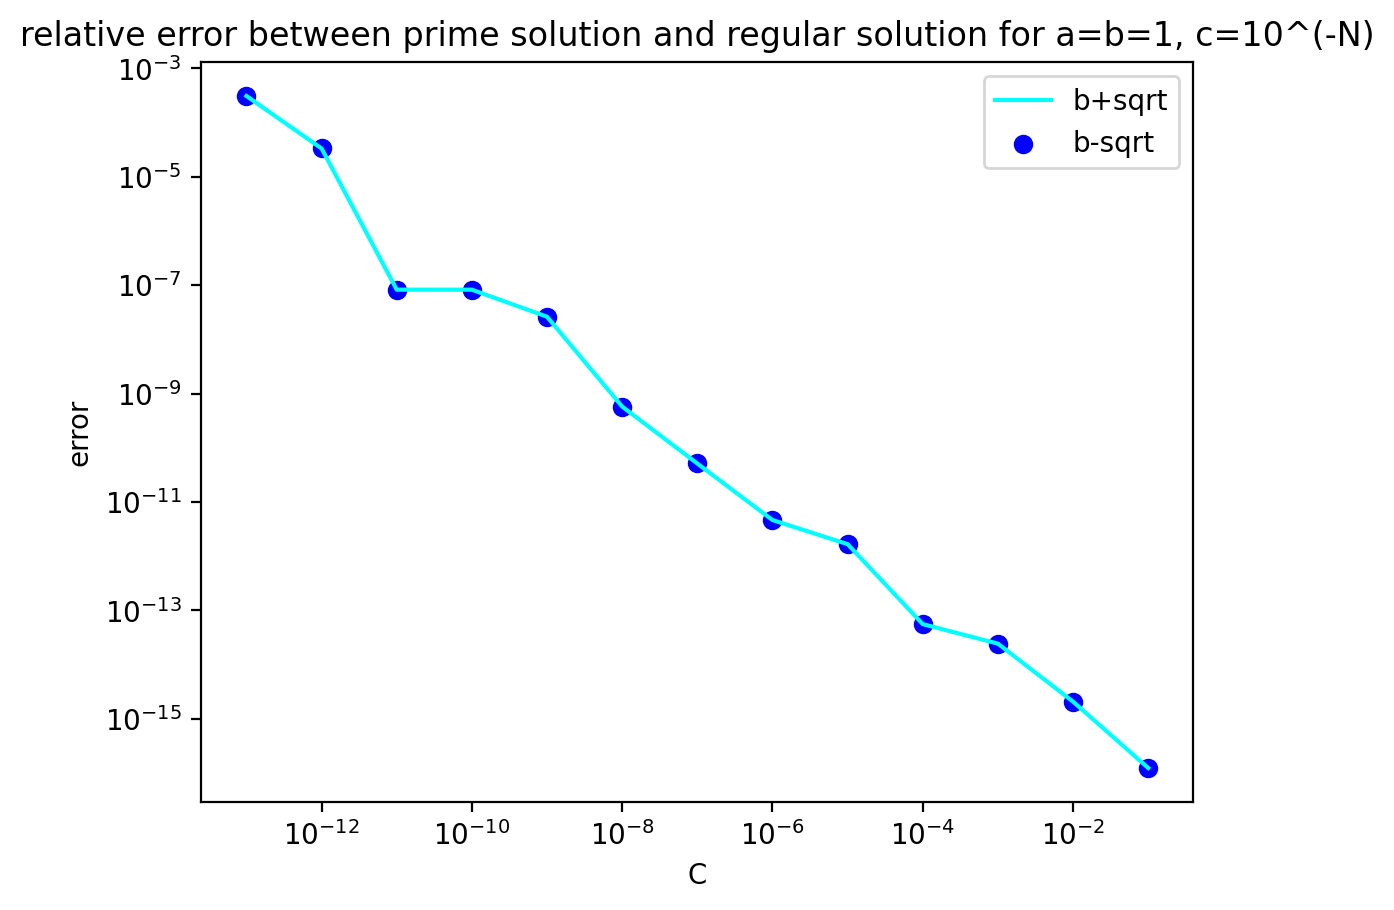

In [16]:
import math
import numpy as np
import matplotlib.pyplot as plt


def quad1(a,b,c):
    return (-b+np.sqrt(b*b-4*a*c))/(2*a)

def quad2(a,b,c):
    return (-b - np.sqrt(b * b - 4 * a * c)) / (2 * a)

def quad3(a,b,c):
    return -(2*c)/(b+np.sqrt(b*b-4*a*c))

def quad4(a,b,c):
    return -(2 * c) / (b - np.sqrt(b * b - 4 * a * c))

c= 10.0**np.arange(-1,-14,-1)
n= 10.0**np.arange(1,14)


r1 = quad1(1,1,c)
r2 = quad2(1,1,c)
r3 = quad3(1,1,c)
r4 = quad4(1,1,c)

difplus = abs(abs(r1-r3)/r1)
difminus = abs(abs(r2-r4)/r2)


plt.plot(c,difplus, label=('b+sqrt'), c='cyan')
plt.scatter(c,difminus, label=('b-sqrt'), c='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('C')
plt.ylabel('error')
plt.title('relative error between prime solution and regular solution for a=b=1, c=10^(-N)')
plt.legend()
plt.show()


Now let's set $a=10^{-3}$ and repeat the calculation:

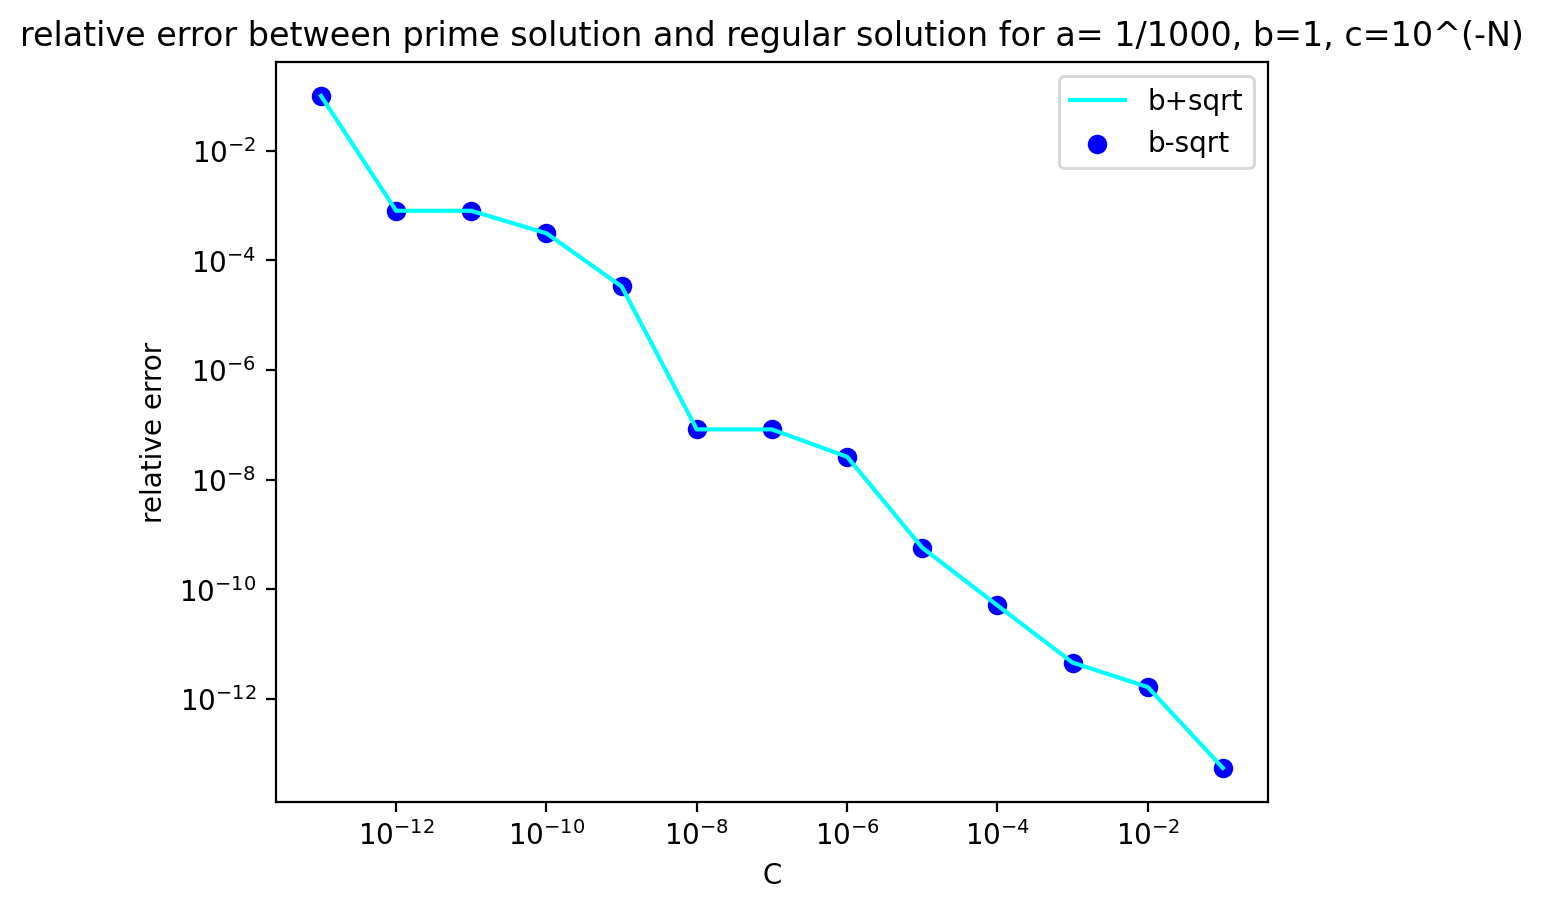

In [17]:

a=1e-3

r1 = quad1(a,1,c)
r2 = quad2(a,1,c)
r3 = quad3(a,1,c)
r4 = quad4(a,1,c)

difplus = abs(abs(r1-r3)/r1)
difminus = abs(abs(r2-r4)/r2)

plt.plot(c,difplus, label=('b+sqrt'), c='cyan')
plt.scatter(c,difminus, label=('b-sqrt'), c='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('C')
plt.ylabel('relative error')
plt.title('relative error between prime solution and regular solution for a= 1/1000, b=1, c=10^(-N)')
plt.legend()
plt.show()

_your comment about how the error is different for small $a$ here_ 

_While the same amount of relative error is produced in each step with a set to 1/1000, all values of error are multiplied by a factor of 10^3. This leads the graphs to have the same shape but relative error values 1000 times larger. If one simply takes the difference for the graphs you will see a greater amount of error produced for the subtraction plots due to more error being created in the subtraction action for values that are aproxamitly b-b._


### Bonus
(+5 points)

-------------------
## Problem 3
(25 points)

Recall, the Maclaurin series for $\sin(x)$ is

$$\sin(x)=x-\frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} ... = \sum_{n=1}^\infty\frac{(-1)^{n-1} x^{2n-1}}{(2n-1)!}$$

You used this often in physics classes, probably without much thought (recall, this was one of the first analytic approximations you ever made in physics -- small amplitude oscillations of a pendulum approximate simple harmonic motion, and we'll take another look at that soon), and now we can explore the behavior of this series numerically.

First, we must make an approximation by summing only the first $N$ terms. Second, that series is numerically worrisome because: 

   - factorials are computationally expensive and are very large for large $N$. For large $x$ we must make $N$ large, as we will see. 
   - dividing two large numbers should be avoided whenever possible: you risk overflows in the numerator and/or denominator when the actual quotient is not large.
   
So, although the infinite series is, in principle, OK, with a radius of convergence that encompasses all reals (yes, you might say it's not clever to do the expansion around $x=0$), it only works for all cases on a calculator with unlimited capacity, which does not exist.


(a) First, let's do the (somewhat) wrong thing and see the consequences. Write a function that returns the nth term for some $x$ using the formula above (factorials and all). Explore: plot the value of each term for $x=1.$, $x=10.$, and $x=50.$, vs. $N$, and quantify where you get into trouble with this algorithm.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

def sin_approx_nth_term(x,n):
#     if x > 7:
#         reduction = x/(2*np.pi)
#         reduction = math.floor(reduction)
#         x = x - 2 * np.pi * reduction
    return (-1)**(n-1)*x**(2*n-1)/np.math.factorial(2*n-1)

def sine_bad2(x,n):
#     if x > 7:
#         reduction = x/(2*np.pi)
#         reduction = math.floor(reduction)
#         x = x - 2 * np.pi * reduction
    tot = 0
    for i in range(1,n+1):
        tot += (((-1)**(i-1) * x**(2*i-1))/np.math.factorial(2*i-1))
    return tot

# print(sine_bad2(50,5000))

print(sin_approx_nth_term(1,3))
print(sine_bad2(34,100))

# exit()


0.008333333333333333
0.5193320689552052


Explore:

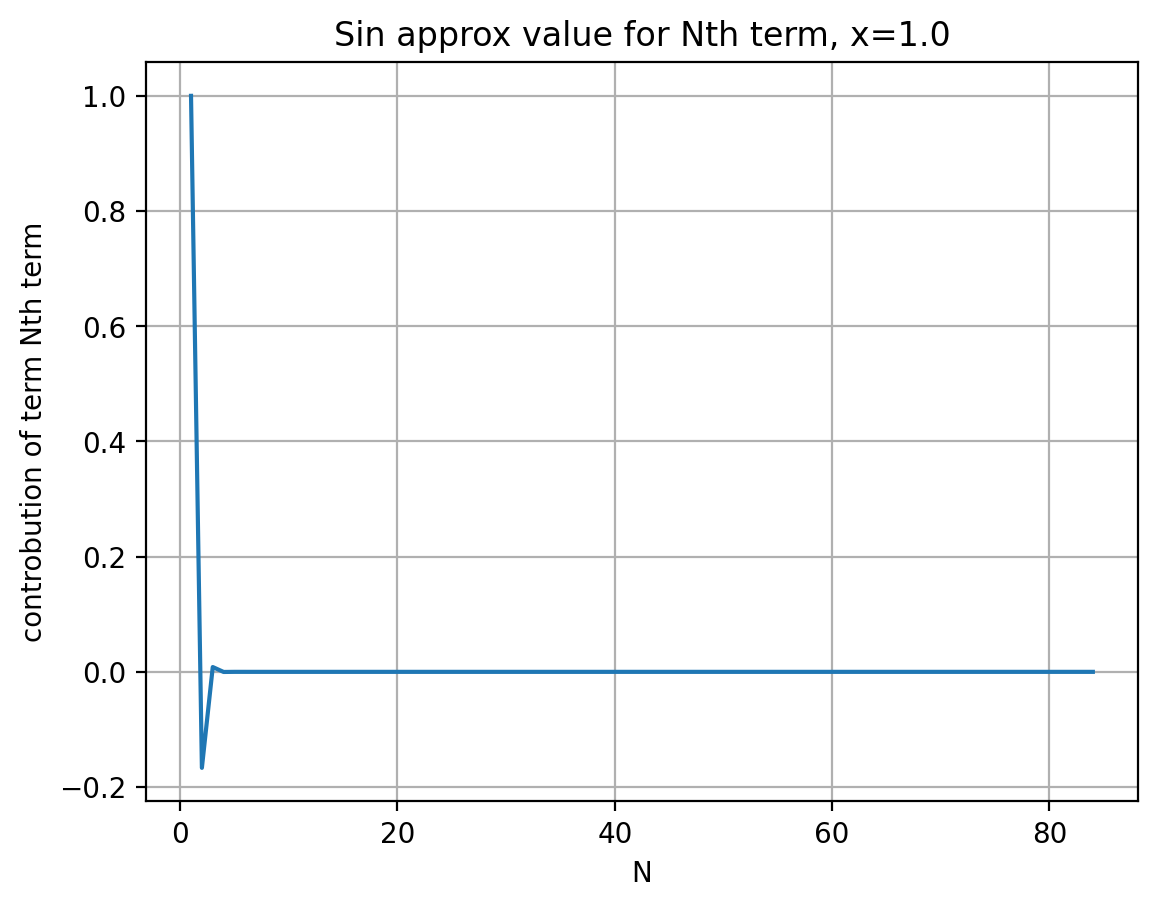

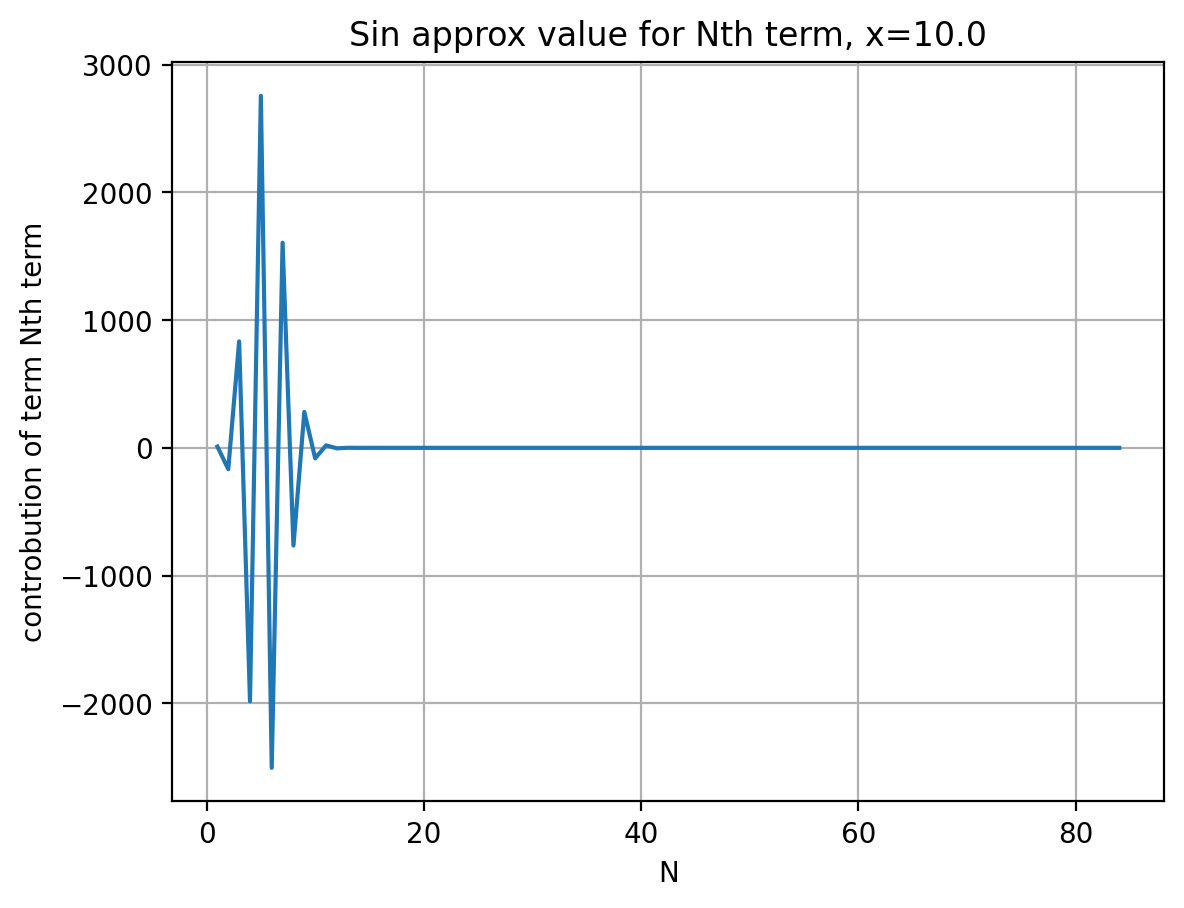

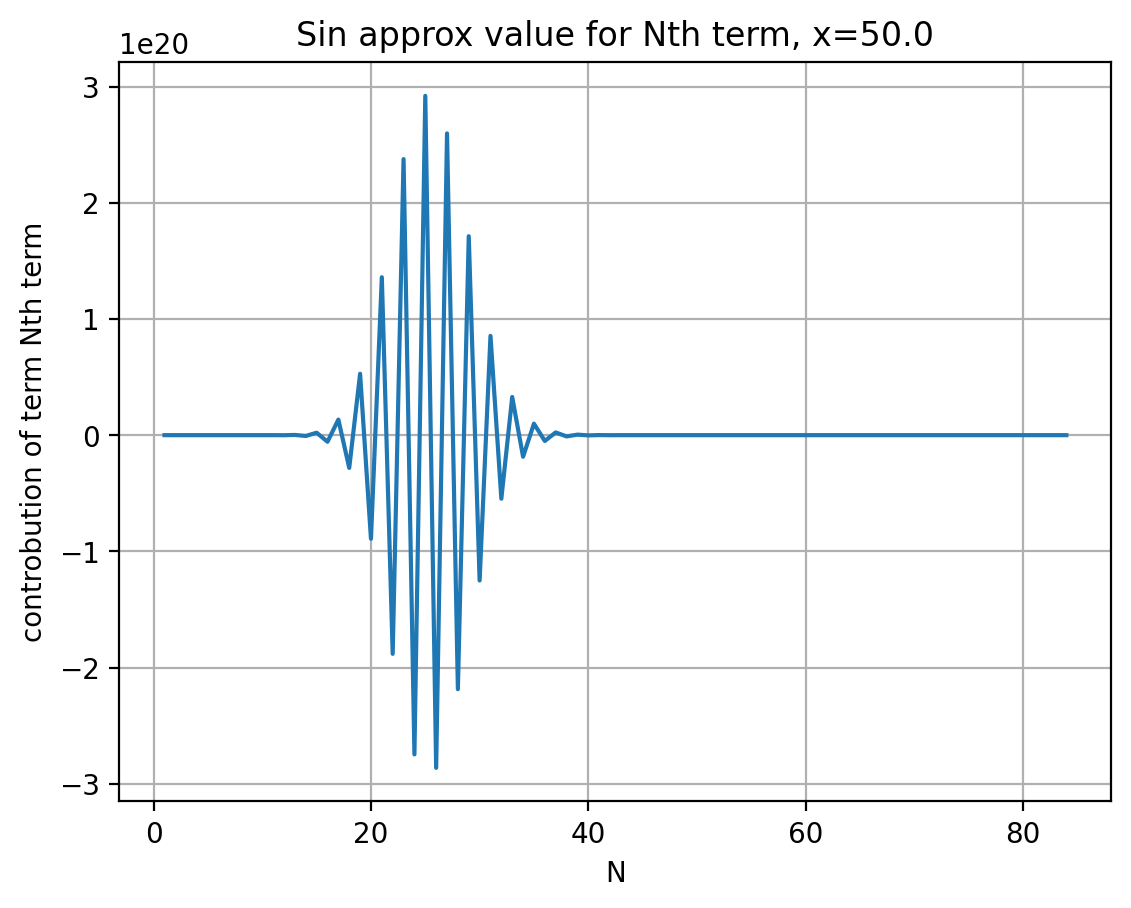

In [6]:
def grapha():
    x=[1.,10.,50.]
    N = np.arange(1,85)
    for j in range(len(x)):
        yaxis1=[]
        for i in range(len(N)):
            yaxis1 = np.append(yaxis1, sin_approx_nth_term(x[j],N[i]))

        plt.plot(N,yaxis1)
        plt.xlabel('N')
        plt.ylabel("controbution of term Nth term")
        plt.title(f'Sin approx value for Nth term, x={x[j]}')
        plt.grid()
        plt.show()

grapha()

N = np.arange(1,10)

your observations here:
this function works well for smaller values of x such as 1 and 10 but quickly reaches overflow errors for larger values of x such as 50 and if it is used to calculated the value of sine, it will not work. After some short testing, the function fails to even meet 2 sigfigs of accuracy as soon as x=34 and rapidly gets worse as x increases. in order to get accurate calculations, N should be at least 2 times larger than the x value.
if you use a type int for x, it breaks a lot faster than a type float
using type float will break the system for N>85 and won't run
using type int will run for large N but won't compute correctly for x>34



(b) You can do much better. Have a look at the textbook section 2.5.1, and make a new version of your function using that method. Make a similar plot showing this is more robust. Make the same plot as in part (a), but also add $x=100.$, along with some other large $x$ values. You might want to let $N$ be larger. However, even though we can calculate the terms now, it isn't clear it's helpful. See below.

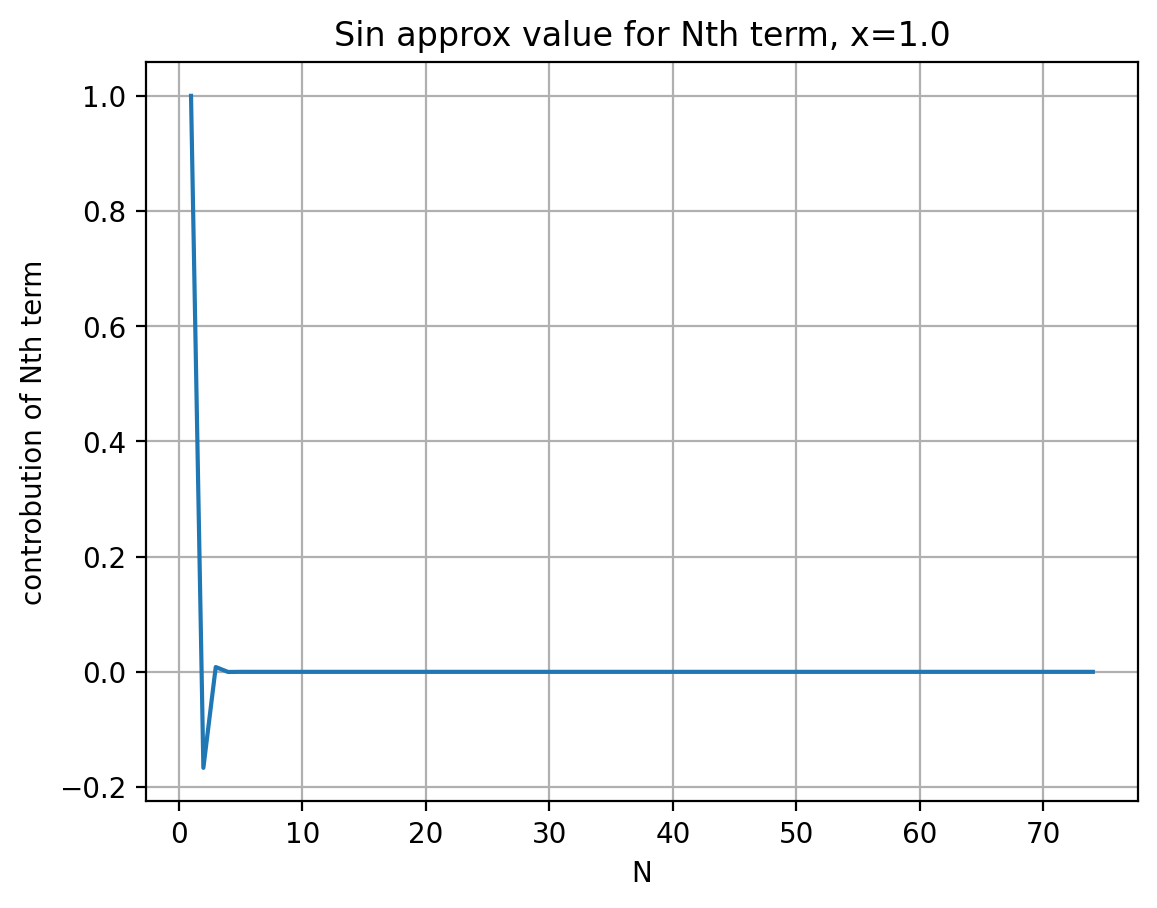

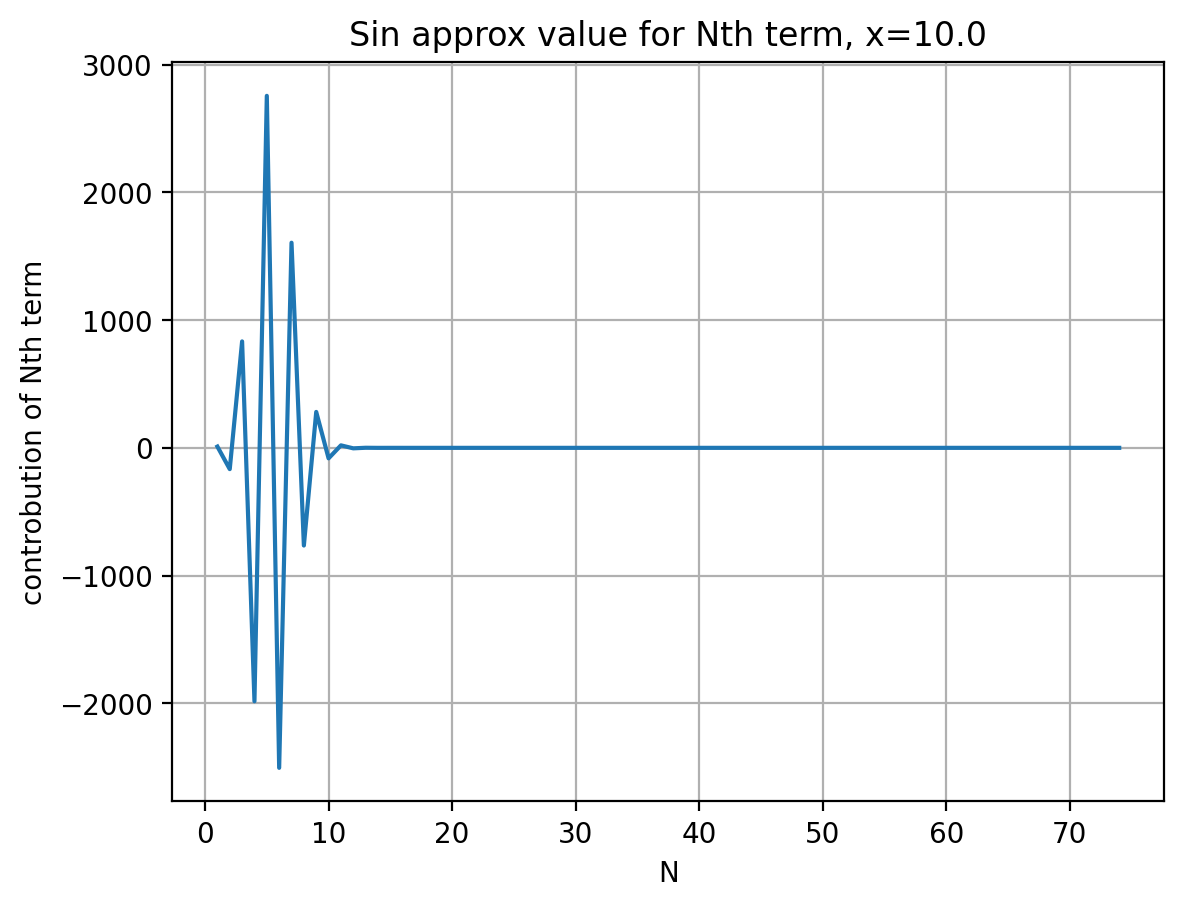

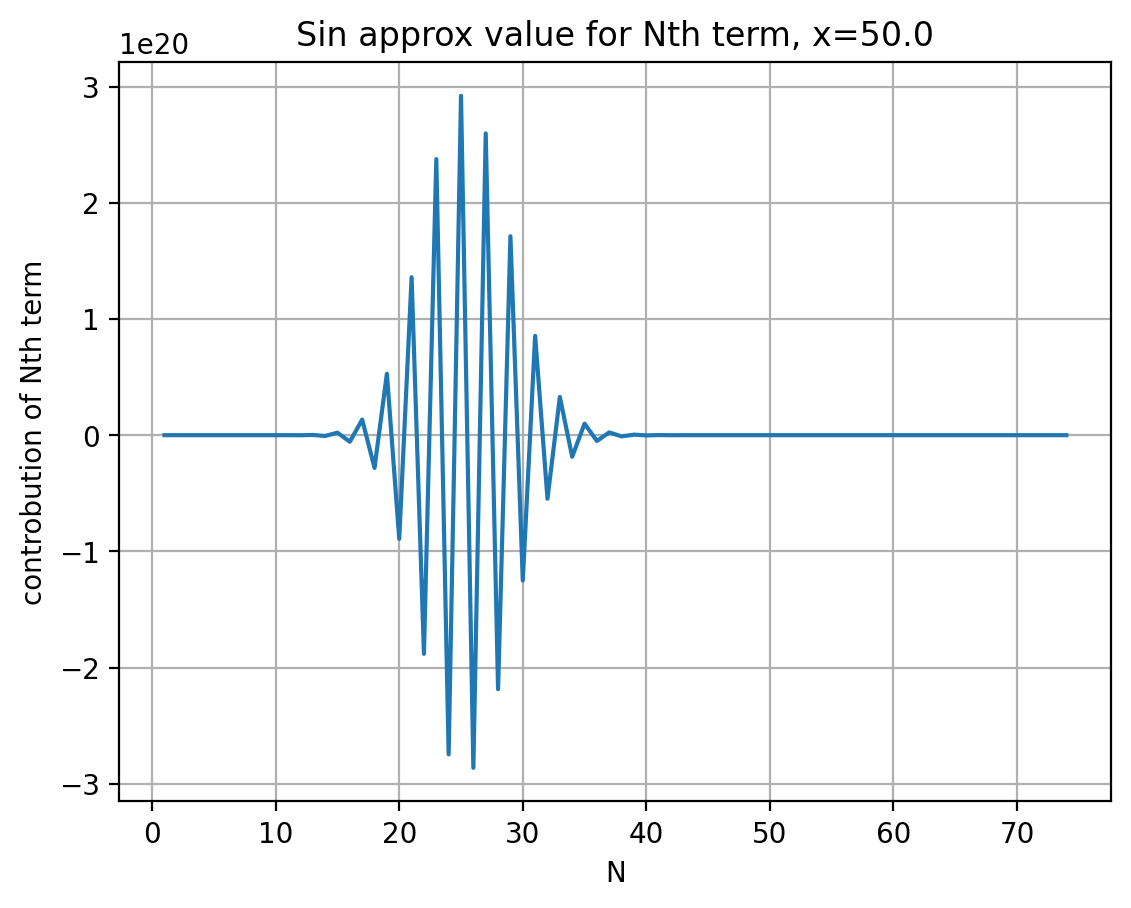

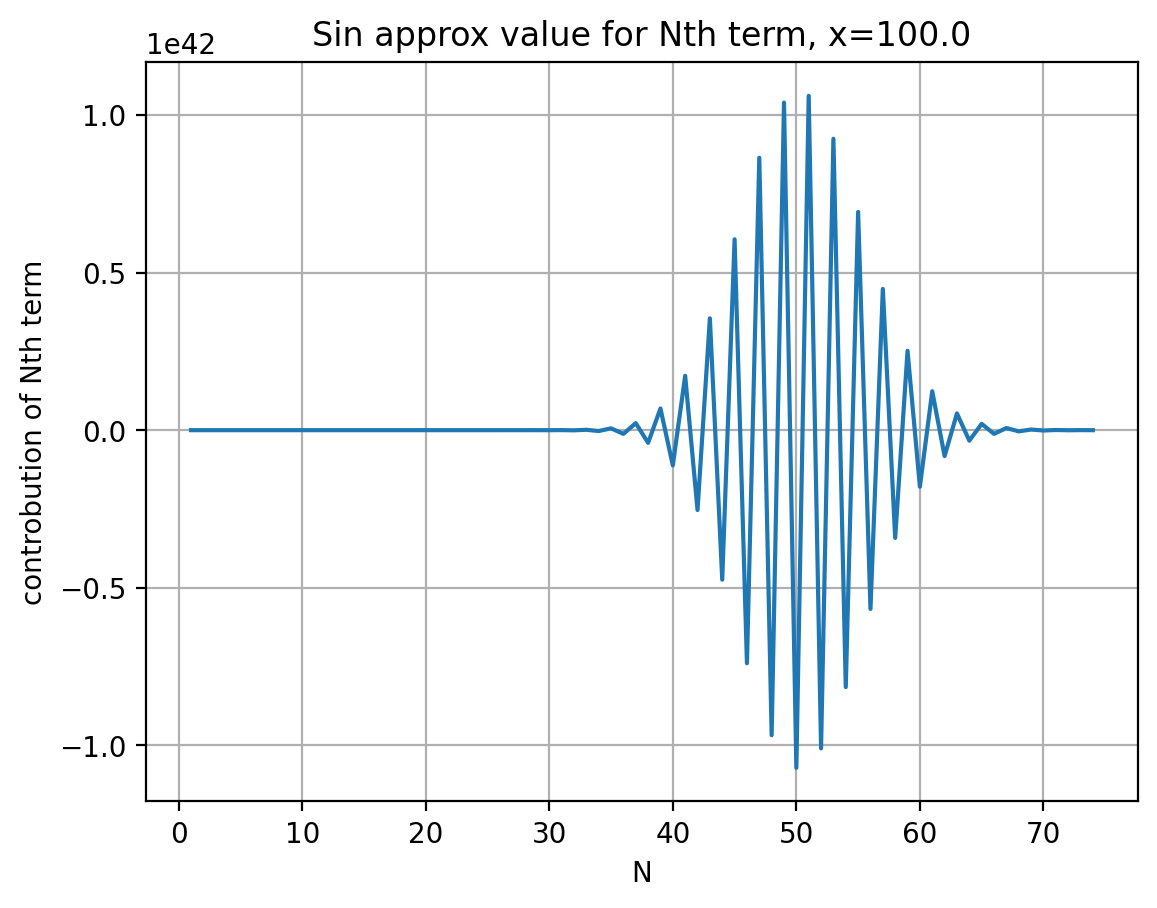

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

def nth_term(x,n,nbefore=1):
#     if x > 7:
#         reduction = x/(2*np.pi)
#         reduction = math.floor(reduction)
#         x = x - 2 * np.pi * reduction
    if nbefore != 1:                        #if a previous value was found it will use that for faster calculations 
        nbefore *= -x**2/(2*n-1)/(2*n-2)
        return nbefore
    a=2
    tot=x                     #first term of a sin expasion 
    while a<n+1:         # counts to term needed 
        # print (-x**2/(2*a-1)/(2*a-2))
        tot *= -x**2/(2*a-1)/(2*a-2)         #calcs term
        a += 1
    # print(tot)
    return tot

def sine(x,n, reduct = 0):
    a=2
    if reduct == 1:         #reduces to the nearest value within 0<x<2*pi
        if x > 7:
            reduction = x/(2*np.pi)
            reduction = math.floor(reduction)
            x = x - 2 * np.pi * reduction
    sum=x                 #sets first term of sin expasion
    nterm = nth_term(x, a) #calcs the second term
    esp = 1/10**8
    if n == 0 or x == 0:   # incase of n==0 or x==0 to escape bugs
#         print("hello")
        return 0
    while a<=n:
        if abs(nterm/sum)<esp:   #break for precison
            return sum
        sum += nterm             #add next term to total 
        a +=1
        nterm = nth_term(x, a, nterm)   # calc the next term in the series 
        # print(sum)
    return(sum)


def sine_2(x,n, reduct = 0):
    ### same function as sine but returns the N amount for precision, just didn't want to choose output
    a=2
    if reduct == 1:
        if x > 7:
            reduction = x/(2*np.pi)
            reduction = math.floor(reduction)
            x = x - 2 * np.pi * reduction
    sum=x
    nterm = nth_term(x, a)
    esp = 1/10**8
    if n == 0 or x == 0:
        return 0
    while a<=n:
        if abs(nterm/sum)<esp:
            return sum, a
        sum += nterm
        a +=1
        nterm = nth_term(x, a, nterm)
        # print(sum)
    return sum, a

# print(sine_2(730,10000))

def graphb():
    N = np.arange(1, 75)
    x=[1.,10.,50.,100.]
    for j in range(len(x)): #to loop over all x values for each graph
        yaxis=[]
        for i in range(len(N)):   #to generate the y values for each x value and plot
            yaxis = np.append(yaxis, nth_term(x[j],N[i]))

        plt.plot(N,yaxis)
        plt.xlabel('N')
        plt.ylabel("controbution of Nth term")
        plt.title(f'Sin approx value for Nth term, x={x[j]}')
        plt.grid()
        plt.show()

graphb()



At this point, we can at least compute the terms.

(c) Now things get more interesting. You might be wondering, __how does this series produce oscillations, and how does $\pi$ come out of it?__ It isn't obvious that this series should have the same value whenever you add or subtract $2m\pi$, where $m=1,2,3,...$. Also, having done all this work, you may be itching to see the actual results! 

Plot $\sin(x)$ in the range $-10<x<10$ for $N=1,2, 3, ..., 15$. On the same plot, show $\sin(x)$ using a built-in math function such as the one in numpy. 

You'll see that, for insufficiently large $N$, the result of your algorithm wanders far outside the valid range (-1,1) of the sine function. **To make the plot useful, you will have to truncate or limit the value when it's outside the valid range** (for example, impose that the absolute value of the result cannot be larger than 2). 

Aside: notice that, in this case, imposing periodic boundary conditions ($\sin(x+n\pi) = \sin(x)$) would have an effect that is similar, to finite precision, to that of adding more terms in the series. Remarkable!

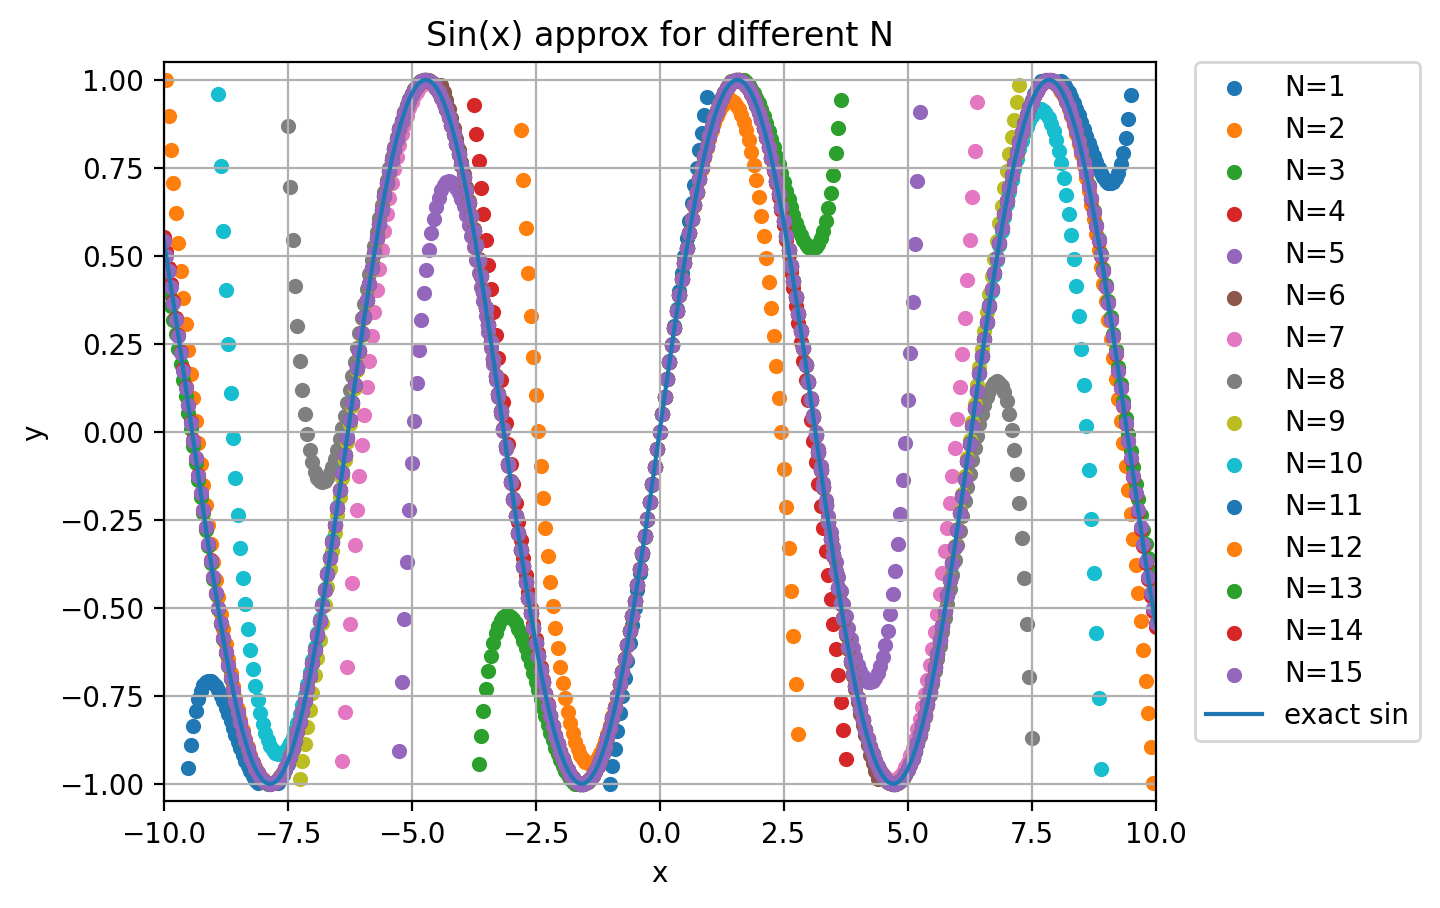

In [19]:
# your code here

def graphc(ind=False):
    xaxis = np.arange(-10, 10.01, .05)
    Nrange = np.arange(1, 16)

    for i in range(len(Nrange)):
        yaxis = []
        xaxis_new=[]
        for j in range(len(xaxis)):   #gen the y values for each x value and graph
            if sine(xaxis[j], Nrange[i], 0) <= 1 and sine(xaxis[j], Nrange[i], 0) >= -1: #for the reduction, set the 0 to 1, also limits to values of only -1 to 1 for ploting
                yaxis.append(sine(xaxis[j], Nrange[i],0)) #set the 0 to 1 for sin((x+2n*pi)) = sin(x)
                xaxis_new= np.append(xaxis_new, xaxis[j])
        plt.scatter(xaxis_new, yaxis, s=20 , label=(f'N={Nrange[i]}'))    
        
        
        if ind ==True:         # if set to True, graphs gen for each N value instead of all at once
            plt.ylim(-1.05, 1.05)
            plt.xlim(-10,10)
            yaxis = np.sin(xaxis)
            plt.plot(xaxis, yaxis, label='exact sin')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.title('Sin(x) approx for different N')
            plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0) #moves the legend outside the graph
            plt.grid()
            plt.show()
    
    if ind==False:   # prints out all N values at once
        plt.ylim(-1.05, 1.05) 
        plt.xlim(-10,10)
        yaxis = np.sin(xaxis)
        plt.plot(xaxis, yaxis, label='exact sin')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Sin(x) approx for different N')
        plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0) #moves the legend outside the graph
        plt.grid()
        plt.show()

graphc(ind=False)  # if you want individual graphs just put ind=True in the function here and it will give a print out for each N value


(d) Now, we need an accuracy estimator to decide how many terms to keep, and we'll do this by comparing the value of the nth term with the running current total. When that's $<10^{-8}$ you can stop. Make a plot of the number of terms, $N$, needed as a function of $x$. Notice two things: 
  1. there is a range of $x$ for which the result is wrong, even though the algorithm completes according to the accuracy estimator (so this is a failure) and 
  2. there is some point at which the alogorithm never completes. The trajectories in parts (a) and (b) give some perspective on this. 


/tmp/ipykernel_8749/555007384.py:11: RuntimeWarning: overflow encountered in scalar multiply
  nbefore *= -x**2/(2*n-1)/(2*n-2)
/tmp/ipykernel_8749/555007384.py:59: RuntimeWarning: invalid value encountered in scalar divide
  if abs(nterm/sum)<esp:
/tmp/ipykernel_8749/555007384.py:61: RuntimeWarning: invalid value encountered in scalar add
  sum += nterm


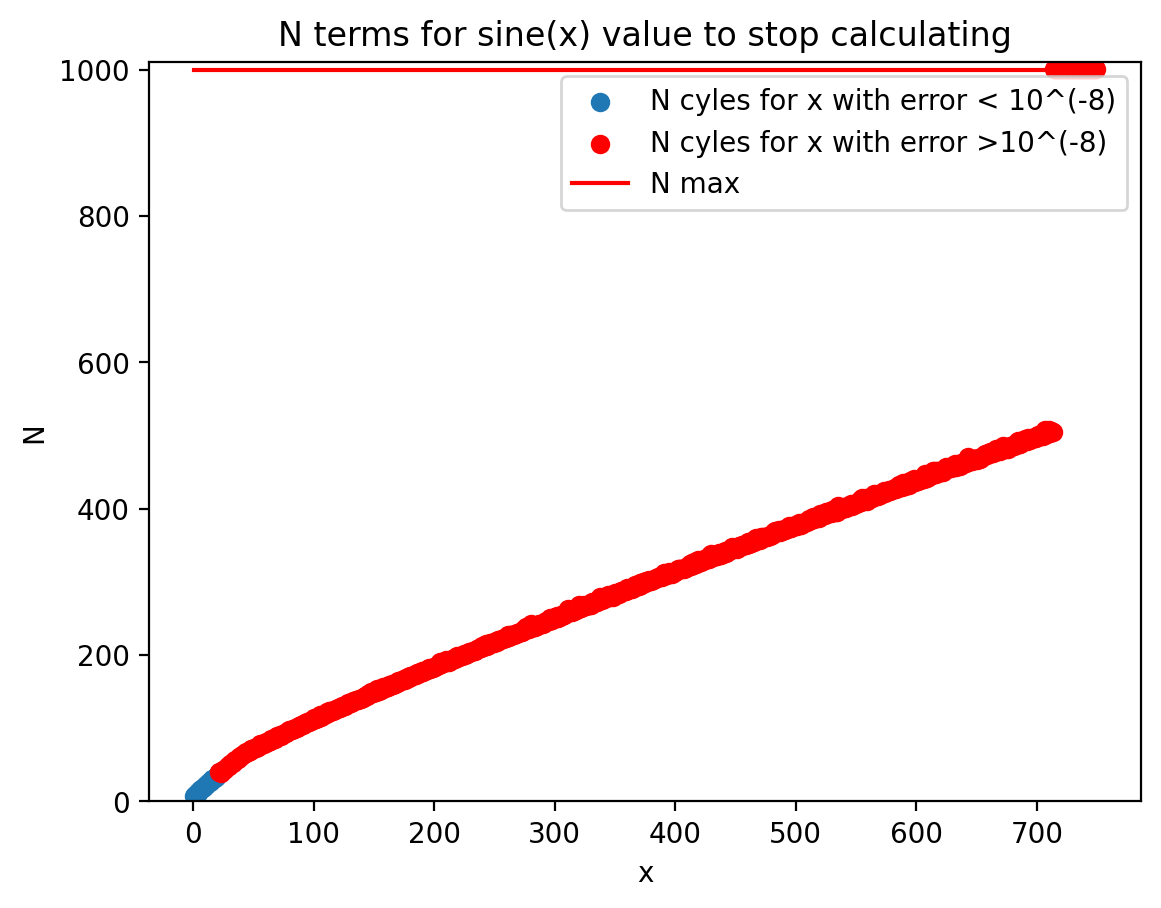

The sine calculation breaks down and never completes at x = 714 resilting in this sin(714) = nan and N = 10001.


In [9]:
xaxis = np.arange(1.,750.,1)
yaxis=[]
nmax=[]
relerr=[]
yaxis_good=[]
xaxis_good=[]
yaxis_bad=[]
xaxis_bad=[]
for i in range(len(xaxis)):
    yaxis.append(sine_2(xaxis[i],1000)[1])
    nmax.append(1000)
    sinx=sine_2(xaxis[i],10000)[0]
    dif = sinx - np.sin(xaxis[i])
    rer = abs(dif/np.sin(xaxis[i]))
    relerr = np.append(relerr, rer)
    if rer <= 10**(-8): #checks if the values are within precision of 10^-8 of real value and designates them accordingly
        yaxis_good.append(yaxis[-1])
        xaxis_good.append(xaxis[i])
    else:
        yaxis_bad.append(yaxis[-1])
        xaxis_bad.append(xaxis[i])
    
    
plt.scatter(xaxis_good,yaxis_good, label=('N cyles for x with error < 10^(-8)'))
plt.scatter(xaxis_bad,yaxis_bad, label=('N cyles for x with error >10^(-8)'), c='r')

# plt.scatter(xaxis,yaxis, label=('N cyles for x'))
# plt.errorbar(xaxis, yaxis, yerr=relerr, xerr=None, ecolor='cyan', label=('error'))

plt.plot(xaxis,nmax, color='red', label=('N max'))
plt.legend()
plt.xlabel('x')
plt.ylabel('N')
plt.title('N terms for sine(x) value to stop calculating')
plt.ylim(0, 1010)
plt.show()

xval=np.arange(1.,730.,1)
sinx=0
dif=0
diflog=[]
relerr=[]
for i in range(len(xval)):
    sinx=sine_2(xval[i],10000)[0]
    dif = sinx - np.sin(xval[i])
    # diflog = np.append(diflog, dif)
    rer = abs(dif/np.sin(xval[i]))
    # relerr = np.append(relerr, rer)
#     if rer >= 10**(-8):        #only prints output if relative error is greater than 10^(-8) #comment this line in for print out of relative errors 
#         print(f"for x= {xval[i]}, the relative error is {rer}.") #this line will need to be commented in as well
        

print(f"The sine calculation breaks down and never completes at x = 714 resilting in this sin(714) = {sine_2(714,10000)[0]} and N = {sine_2(714,10000)[1]}.")

(e) Finally, let's look at the accuracy trajectory: show the error as a function of $N$ for a range of $x$ values (do at least $x=5.$ and $x=0.1$), similar to what we did in lecture for the exponential (see Lectures1.ipynb). Feel free to explore and to present the information in whatever way you think is instructive. What is this telling you?

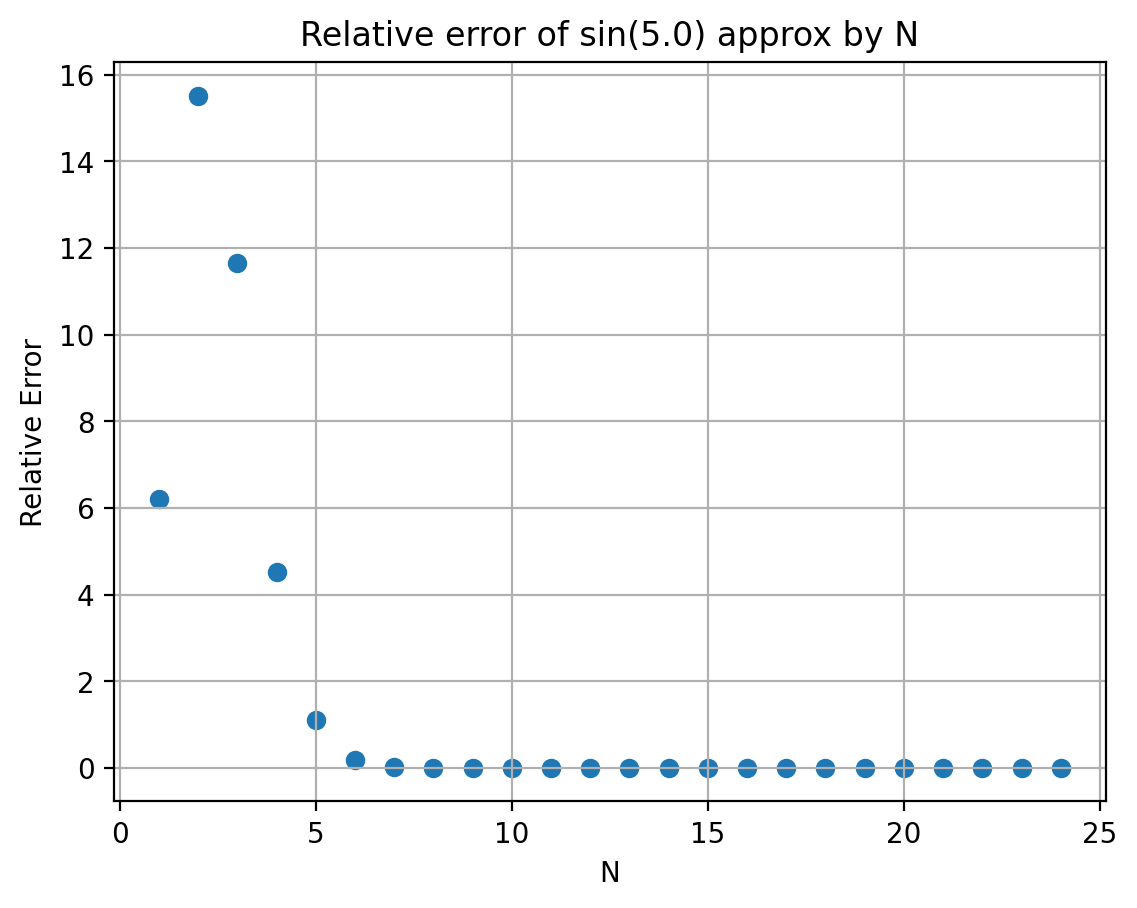

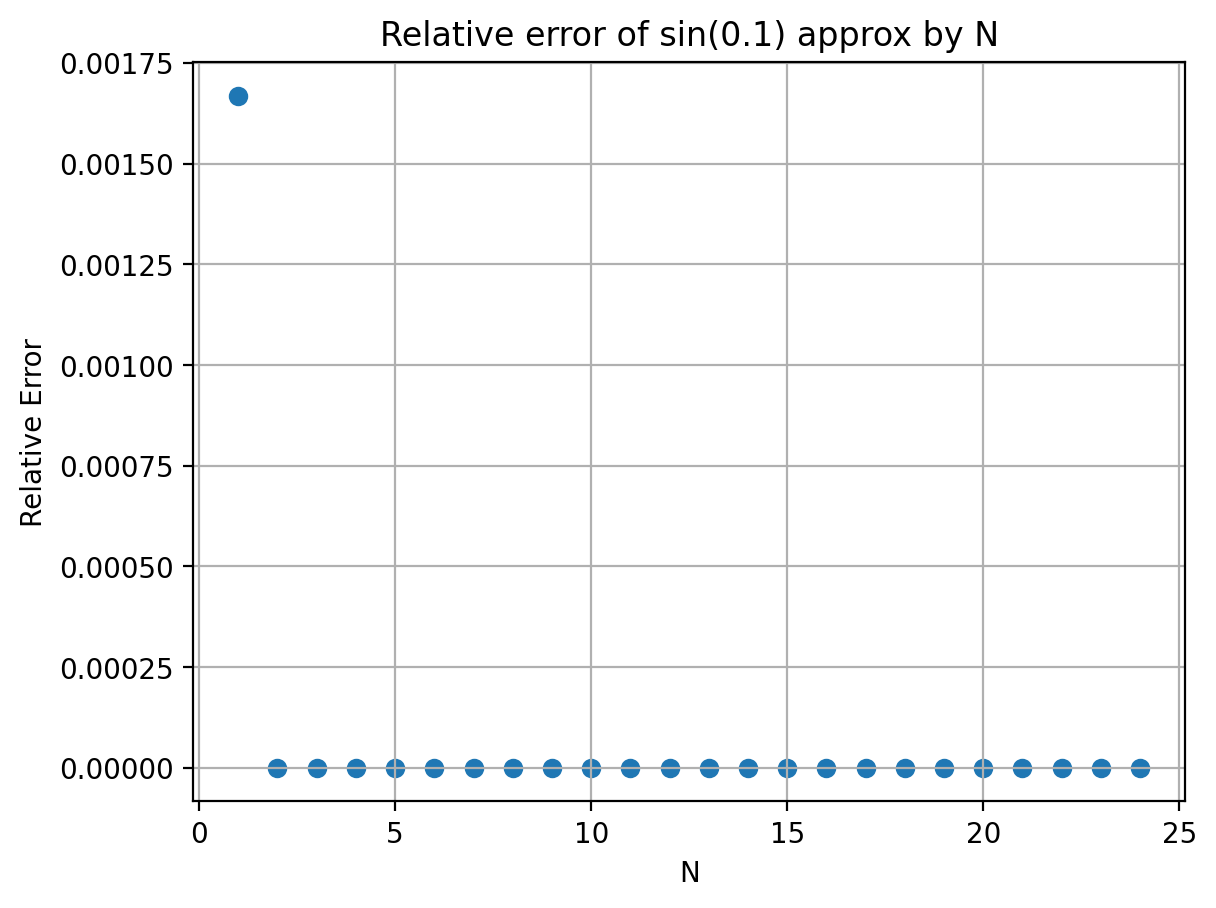

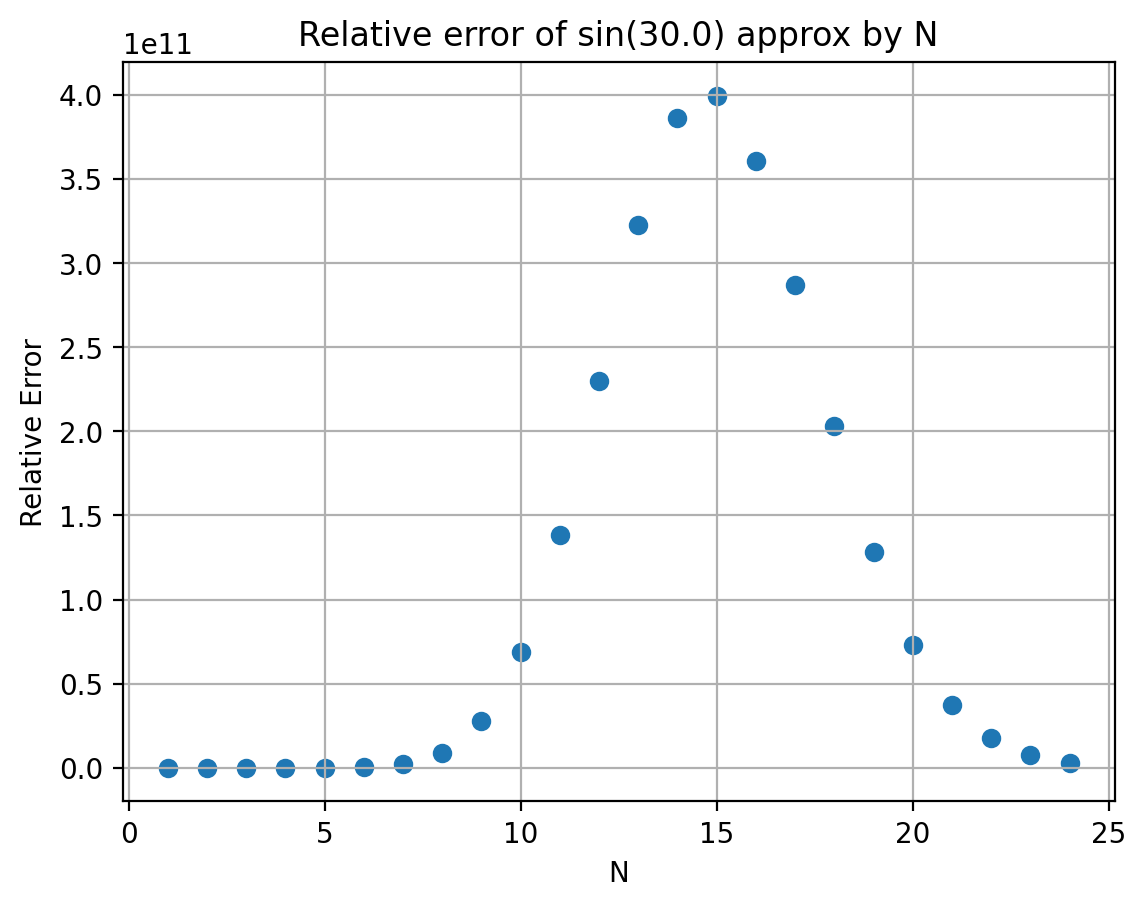

In [10]:
# your code here

def parte(x):
    Nrange = np.arange(1, 25)
    calcedval=[]
    exact=np.sin(x)
    for i in range(len(Nrange)):
        calcedval=np.append(calcedval, sine(x,Nrange[i]))
        # exact=np.append(exact, np.sin(x))
    error = abs((calcedval-exact)/exact)    #calcs relative error 
    # print(error)
    plt.scatter(Nrange,error)               
    plt.xlabel('N')
    plt.ylabel('Relative Error')
    plt.title(f"Relative error of sin({x}) approx by N")
    plt.grid()
    plt.show()

parte(5.)
parte(.1)
parte(30.)

Your observatrions here:
After some testing it is found that the error peaks when N is slightly larger than x/2 and going term by term in sine calculations for a given N it also shows that the value of the approximation increases to that point before falling back down. That leads me to beleive this is an accurate result. This result also matches the graphs in part a and b as the largest term is at x/2 and it balances out after that point.


----------------------------
----
## BONUS Problem 4
(+10 points)

This problem is optional, and it should be done only after you've completed the rest of the problem set.

Read section 3.2 (Error in Bessel Functions) of the texbook, and do the first four parts of the five-part problem in section 3.2.2. The principal author of the book says that students really enjoy this problem -- is the author right? It is of some interest also because you have used recursion relations in your other classes.




For purposes of comparison, also import the `scipy` version of the spherical Bessel function.

In [11]:
from scipy.special import spherical_jn

### Part 1

In [32]:
# your code here. Make a well-formatted table showing the values for those three values of x.
from tabulate import tabulate

def up(x,L):
    j=[]
    j = np.append(j, np.sin(x)/x)         #gens first term
    if L == 0:
        return j
    j= np.append(j, np.sin(x)/(x**2) - np.cos(x)/x)    #gen second term
    value = 0
    for i in range(1,L):         #gens terms from 2-L
        value = (j[i] * (2*i + 1) / x) - j[i - 1]
        j = np.append(j, value)

    # print(f'For x = {x}')
    # for i in range(len(j)):
    #     print(f'j_{i} = {j[i]}')
    return j

# up(1,26)

print()

def down(x,L=50):
    j=[]
    j = np.append(j, 1)   #adds 1 to the list
    j= np.append(j, 1)    #adds another 1 to the list
    count = L
    for i in range(0,L):  #generates values from L down to 2
        value = (j[i+1] * (2*count + 1) / x) - j[i]
        # print(value)
        j = np.append(j, value)
        count += -1

    ratio = (np.sin(x) / x) / j[-1]  #scales the values 
    j = j[::-1]*ratio  # reverses the order of the array and corrects  the values by the ratio

    # print(f'For x = {x}')
    # for i in range(len(j-1)):
    #     print(f'j_{i} = {j[i]}')
    # for i in range(26):
    #     print(f'j_{i} = {j[i]}')
    return j



x=[.1,1,10]
table = ['x', 'N', 'down', 'up', 'exact']

for i in range(len(x)):
    downresult = down(x[i])
    upresult = up(x[i],25)
    for j in range(26):
        table = np.append(table, x[i])
        table = np.append(table, j)
        table = np.append(table, downresult[j])
        table = np.append(table, upresult[j])
        table = np.append(table, spherical_jn(j,x[i]))
table=np.reshape(table, (79,5))   #reshapes for better print out
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))   #uses a package to formate and look nice


╒══════╤═════╤══════════════╤═══════════════════╤══════════════╕
│    x │   N │         down │                up │        exact │
╞══════╪═════╪══════════════╪═══════════════════╪══════════════╡
│  0.1 │   0 │  0.998334    │       0.998334    │  0.998334    │
├──────┼─────┼──────────────┼───────────────────┼──────────────┤
│  0.1 │   1 │  0.0333      │       0.0333      │  0.0333      │
├──────┼─────┼──────────────┼───────────────────┼──────────────┤
│  0.1 │   2 │  0.000666191 │       0.000666191 │  0.000666191 │
├──────┼─────┼──────────────┼───────────────────┼──────────────┤
│  0.1 │   3 │  9.51852e-06 │       9.51852e-06 │  9.51852e-06 │
├──────┼─────┼──────────────┼───────────────────┼──────────────┤
│  0.1 │   4 │  1.05772e-07 │       1.05601e-07 │  1.05772e-07 │
├──────┼─────┼──────────────┼───────────────────┼──────────────┤
│  0.1 │   5 │  9.61631e-10 │      -1.4457e-08  │  9.61631e-10 │
├──────┼─────┼──────────────┼───────────────────┼──────────────┤
│  0.1 │   6 │  7.39754e

### Parts 2 and 3
by "tune", the textbook means finding a starting $l$ for the downward recursion such that starting one $l$ larger results in a final value that fractionally differs by less than $10^{-10}$. 

In [13]:
def findL(p=0):
    relerr = 10000
    exact = 9.006581118 * 10 ** (-3)  # for x=1, N=3
    exact = 1.255780236 * 10 ** (-1)  # for x=10 N=8
    term = 10  # fast way to set desired term
    xval = 10
    # exact = up(xval, 100)[term] # if up was built correctly, use it as a way to find exact for more values than the book provides
    exact = spherical_jn(term,xval)
    startval = term - 1  # start val must be at most 1 value less than desired N value

    while relerr > 10 ** (-10):
        calc = down(xval, startval)[term]
        relerr = abs((exact - calc) / exact)
        exact = calc
        startval += 1

    if p == 0:
        print(f'The l value is {startval - 1} for error less than 10^-10 while x={xval} and N={term},')
    return startval - 1
# print(findL(1))


findL()

#it can be shown that the value of l is different for differnt x terms and Nth term so to find any one in particular just follow the imput direction for the function

The l value is 22 for error less than 10^-10 while x=10 and N=10,


22

### Part 4

Don't bother printing anything here. Instead, make a log-log plot with $0.1<x<10.$ along the horizontal axis and the relative difference quantity shown in the book along the vertical axis for the first 7 $l$ values. Be sure to include a legend.

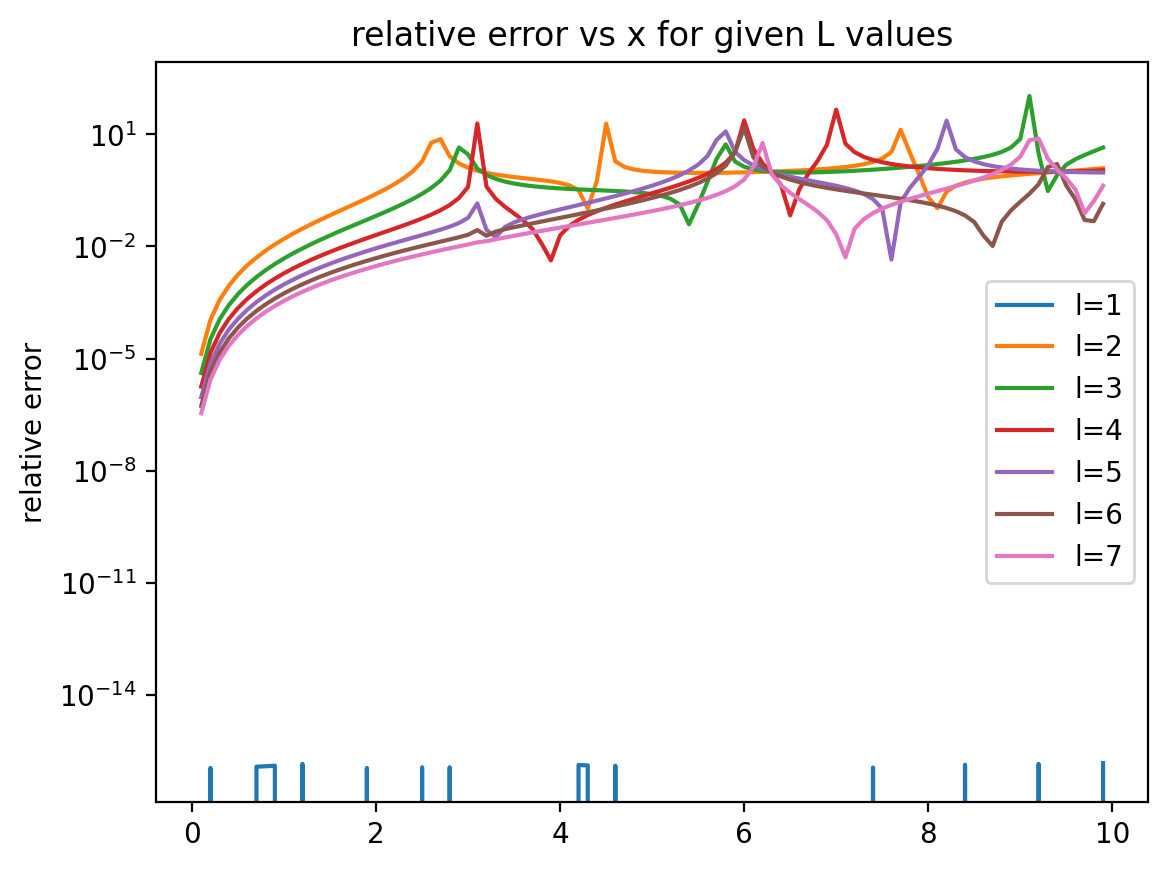

In [14]:
# xvalues = np.arange(.1,10,.1)
# lvals=np.arange(1,8,1)
# for j in range(len(lvals)):
#     yaxis=[]
#     for i in range(len(xvalues)):
#         calc = down(xvalues[i],lvals[j])[1]
#         exact = spherical_jn(1,xvalues[i])
#         relerr = abs(exact-calc)/exact
#         yaxis = np.append(yaxis, relerr)
# #         calc = up(xvalues[i],lvals[j])[j]
# #         yaxis = np.append(yaxis, calc)
#     plt.plot(xvalues, yaxis, label=(f'l={lvals[j]}'))
#     print()
# plt.legend()
# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel('x')
# plt.ylabel('relative error')
# plt.title('relative error vs x for given L values')
# plt.show()


xvalues = np.arange(.1,10,.1)
lvals=np.arange(1,8,1)
for i in range(len(lvals)):
    yaxis=[]
    for j in range(len(xvalues)):
        calc = down(xvalues[j], i+1)[i]
        exact = spherical_jn([i],xvalues[j])
        relerr = abs((exact-calc)/exact)
        yaxis = np.append(yaxis, relerr)
    plt.plot(xvalues, yaxis, label=(f'l={lvals[i]}'))
plt.legend()
# plt.xscale('log')
plt.yscale('log')
plt.ylabel('relative error')
plt.title('relative error vs x for given L values')
plt.show()
